# Exploratory Data Analysis

## DATA UNDERSTANDING

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
#menampilkan 5 baris pertama dari dataset
df.head()

Dataset ini merupakan data customer mall yang terdiri dari 5 variabel yaitu customerID, Gender, Age, Annual Income (pendapatan tahunan customer dalam satuan ribu dollar), dan Spending Score (skor yang ditentukan pihak mall berdasarkan sifat dan kebiasaan belanja customer)

In [ ]:
df.shape

Dataset ini terdiri dari 200 baris dan 5 kolom

In [ ]:
#menampilkan nama seluruh kolom
df.columns

In [ ]:
df.describe().transpose()

Syntax di atas menampilkan jumlah, rata-rata, standar deviasi, nilai minimal, maksimal, kuartil 1, 2, dan 3 untuk setiap variabel numerik. Pada variabel annual income, terdapat 200 customer dengan rata-rata pendapatan tahunan sebesar 60.56 ribu dollar, pendapatan tahunan terbesar 137 ribu dollar, dan pendapatan tahunan terkecil 15 ribu dollar.

In [ ]:
#menampilkan value unik pada variabel Gender
df['Gender'].unique()

In [ ]:
#menampilkan jumlah value unik pada variabel Spending Score (1-100)
df['Spending Score (1-100)'].nunique()

## DATA CLEANING

### 1. Hapus duplikat data dan variabel yang tidak relevan dengan analisis

In [ ]:
#cek duplikat
df[df.duplicated()]

Dalam dataset ini tidak terdapat duplikat data

In [ ]:
#drop irrelevant columns (yg tidak berkaitan dengan analisis)
df = df.drop(columns=['CustomerID'])

Variabel atau kolom customerID tidak diperlukan dalam analisis ini, maka kita bisa menghapusnya

### 2. Fix struktur data yang tidak konsisten dan error

In [ ]:
df.dtypes

Setiap variabel sudah sesuai dengan type datanya, maka tidak ada yang perlu diubah.

### Outlier Handling

In [ ]:
sns.boxplot(df['Age'])

Pada variabel Age tidak terdapat outlier

In [ ]:
sns.boxplot(df['Annual Income (k$)'])

Pada variabel Annual Income terdapat value yang di luar batas atas. Untuk mengetahuinya, kita perlu melakukan perhitungan manual.

In [ ]:
#outlier Annual Income (k$)

Q1_I = df['Annual Income (k$)'].quantile(0.25)
Q3_I = df['Annual Income (k$)'].quantile(0.75)
IQR_I = Q3_I - Q1_I
lower_bound_I = Q1_I - 1.5*IQR_I
upper_bound_I = Q3_I + 1.5*IQR_I

outlier_I = df[df['Annual Income (k$)'] > upper_bound_I]
outlier_I

Pada variabel Annual Income terdapat dua value yang diluar batas atas yaitu value ke 199 dan 200. Kedua value tersebut diduga merupakan outlier. Untuk mengetahuinya IQR tidak dikalikan dengan 1.5 melainkan dengan 4.5 lalu menghitung ulang batas atas.

In [ ]:
upper_bound_I = Q3_I + 4.5*IQR_I

outlier_I = df[df['Annual Income (k$)'] > upper_bound_I]
outlier_I

Dari perhitungan di atas, maka tidak ada outlier pada variabel Annual Income.

In [ ]:
sns.boxplot(df['Spending Score (1-100)'])

Pada variabel Spending Score tidak terdapat outlier.

### 4. Missing Values Handling

In [ ]:
df.isnull().sum()

Dalam dataset ini tidak terdapat missing value.

## VISUALIZATION

In [ ]:
Male_count = df[df['Gender'] == 'Male']['Gender'].count()
Female_count = df[df['Gender']=='Female']['Gender'].count()
Gender_count = [Male_count, Female_count]
Gender_count

plt.pie(Gender_count, labels = ["Male", "Female"], autopct = '%1.1f%%')
plt.title('Gender')

Dari piechart di atas, diketahui bahwa lebih banyak customer perempuan dibandingkan customer laki-laki. Jumlah customer perempuan sebanyak 56% atau 112 customer, dan jumlah customer laki-laki sebanyak 44% atau 88 customer.

In [ ]:
sns.histplot(data= df, x='Annual Income (k$)', bins=20)

Dari histogram di atas, diketahui bahwa variabel Annual Income tidak berasal dari distribusi normal.

In [ ]:
sns.boxplot(data=df,x='Spending Score (1-100)',y='Gender')

Dari kedua boxplot di atas, diketahui bahwa antara customer perempuan dan laki-laki tidak terdapat perbedaan signifikan mengenai spending score.

In [ ]:
plt.scatter('Age', 'Spending Score (1-100)', data = df)

In [ ]:
plt.scatter('Age','Annual Income (k$)', data = df)

In [ ]:
plt.scatter('Annual Income (k$)', 'Spending Score (1-100)', data = df)

Dari ketiga scatter plot di atas, menunjukkan bahwa dari ketiga variabel (Age, Annual Income, dan Spending Score) tidak berkorelasi/ berhubungan antara satu sama lain.

# CLUSTERING

Analisis cluster digunakan untuk mengklasifikasi objek/pengamatan ke dalam kelompok homogen yang disebut cluster.

In [ ]:
#Import library yang dibutuhkan

from sklearn.cluster import KMeans

In [ ]:
dfcluster = df.drop(columns=['Gender'])

Variabel Gender tidak akan dilibatkan dalam analisis cluster, maka variabel tersebut didrop.

## Model Cluster 1 (berdasarkan variabel Annual Income dan Spending Score)

<Figure size 1152x576 with 0 Axes>

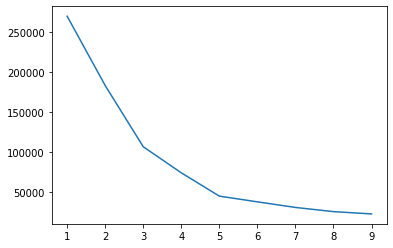

<Figure size 1152x576 with 0 Axes>

In [ ]:
#Elbow Method
#untuk mencari jumlah cluster optimal jika tidak diketahui akan dibagi berapa cluster

dist = []
K = range (1, 10)

for i in K:
  kmean = KMeans(n_clusters = i)
  kmean.fit(dfcluster[['Annual Income (k$)', 'Spending Score (1-100)']])
  dist.append(kmean.inertia_)

plt.plot(K, dist)
plt.figure(figsize = (16,8))

Untuk mengetahui berapa jumlah cluster optimal yang diperlukan, kita bisa menggunakan metode Elbow. Cari titik dimana garis mengalami patahan atau membentuk siku yaitu pada titik ke 3.

In [ ]:
#buat model dengan jumlah cluster = 3

model1 = KMeans(n_clusters=3)
model1.fit(dfcluster[['Annual Income (k$)', 'Spending Score (1-100)']])
print(model1.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [ ]:
df['Cluster1'] = model1.labels_
#buat kolom baru di df dengan nama Cluster yg isinya merupakan variabel cluster
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster1
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


Text(0, 0.5, 'Spending Score (1-100)')

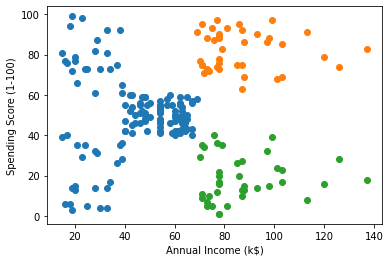

In [ ]:
#buat visualisasinya
df1a=df[df['Cluster1']==0]
df1b=df[df['Cluster1']==1]
df1c=df[df['Cluster1']==2]

plt.scatter(df1a['Annual Income (k$)'],df1a['Spending Score (1-100)'])
plt.scatter(df1b['Annual Income (k$)'],df1b['Spending Score (1-100)'])
plt.scatter(df1c['Annual Income (k$)'],df1c['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

Cluster yang terbentuk dari model 1 ada sebanyak 3 cluster. Dengan plot antara Annual Income dan Spending score diketahui bahwa cluster tersebut memiliki karakteristik tertentu yaitu
* Cluster 1 (titik data berwarna biru) adalah customer dengan Annual Income rendah (antara 15 sampai 70 ribu dollar) dan Spending score menyebar antara 1 - 99.
* Cluster 2 (titik data berwarna hijau) adalah customer dengan Annual Income tinggi (antara 70 sampai 140 ribu dollar) dan Spending Score rendah (antara 1-40).
* Cluster 3 (titik data berwarna oranye) adalah customer dengan Annual Income tinggi (antara 70 sampai 140 ribu dollar) dan Spending Score yang juga tinggi (antara 60-99).

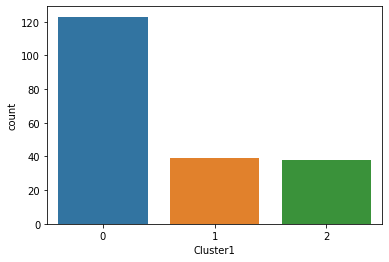

In [ ]:
sns.countplot(data = df, x = 'Cluster1')
#liat jumlah data tiap cluster

Dari barplot di atas, diketahui bahwa jumlah cluster 2 dan 3 sama yaitu 40, sedangkan cluster 1 memiliki jumlah terbanyak yaitu 120.

### Evaluasi

Evaluasi model yang digunakan ada tiga yaitu Silhouette Coefficient, Calinski-Harabasz Index, dan Davies-Bouldin Index

In [ ]:
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

In [ ]:
metrics.silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)']], model1.labels_, metric='euclidean')

0.46761358158775435

Metrics ini membagi setiap value/pengamatan dan membandingkan dua skor yaitu nilai a (rata-rata jarak antara sebuah pengamatan dengan pengamatan lain dalam satu cluster) dan nilai b (rata-rata jarak antara sebuah pengamatan dengan pengamatan lain di cluster lain terdekat).

Nilai metrics ini antara 0 - 1, semakin mendekati 1 maka cluster semakin baik.

Pada model cluster pertama, diperoleh nilai silhouette sebesar 0,468 yang artinya kualitas cluster kurang baik/lemah.

In [ ]:
metrics.calinski_harabasz_score(df[['Annual Income (k$)', 'Spending Score (1-100)']], model1.labels_)

151.5570090006799

Indeks Calinski-Harabasz menghitung perbandingan antara nilai
Sum of Square between cluster sebagai separation dan nilai Sum of Square within
cluster sebagai compactness yang dikalikan dengan faktor normalisasi.

Semakin besar nilai index ini maka cluster semakin baik.

Pada model cluster pertama, diperoleh nilai index Calinski-Harabasz sebesar 151,557 yang artinya kualitas cluster kurang baik/lemah.

In [ ]:
davies_bouldin_score(df[['Annual Income (k$)', 'Spending Score (1-100)']], model1.labels_)

0.7152768202484618

Indeks Davies-Bouldin menghitung rata-rata nilai 'similarity' di antara cluster. Nilai 'similarity; yaitu perbandingan jarak antar cluster dengan ukuran cluster itu sendiri.

Semakin kecil (mendekati 0) nilai index ini maka cluster semakin baik.

Pada model pertama didapat nilai indek Davies-Bouldin sebesar 0.715 yang tidak mendekati 0, artinya kualitas cluster kurang baik/lemah.

## Model Cluster 2 (berdasarkan variabel Age dan Spending Score)

<Figure size 1152x576 with 0 Axes>

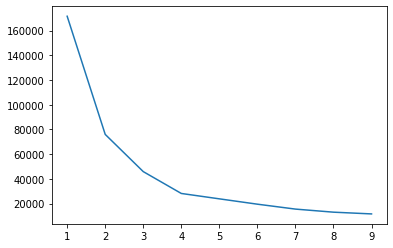

<Figure size 1152x576 with 0 Axes>

In [ ]:
#Elbow Method
#untuk mencari jumlah cluster optimal jika tidak diketahui akan dibagi berapa cluster

dist = []
K = range (1, 10)

for i in K:
  kmean = KMeans(n_clusters = i)
  kmean.fit(dfcluster[['Age', 'Spending Score (1-100)']])
  dist.append(kmean.inertia_)

plt.plot(K, dist)
plt.figure(figsize = (16,8))

Untuk mengetahui berapa jumlah cluster optimal yang diperlukan, kita bisa menggunakan metode Elbow. Cari titik dimana garis mengalami patahan atau membentuk siku yaitu pada titik ke 2.

In [ ]:
#buat model dengan jumlah cluster = 2

model2 = KMeans(n_clusters=2)
model2.fit(dfcluster[['Age', 'Spending Score (1-100)']])
print(model2.labels_)

[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1
 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1
 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


In [ ]:
df['Cluster2'] = model2.labels_
#buat kolom baru di df dengan nama Cluster yg isinya merupakan variabel cluster
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster1,Cluster2
0,Male,19,15,39,0,1
1,Male,21,15,81,0,0
2,Female,20,16,6,0,1
3,Female,23,16,77,0,0
4,Female,31,17,40,0,1


Text(0, 0.5, 'Spending Score (1-100)')

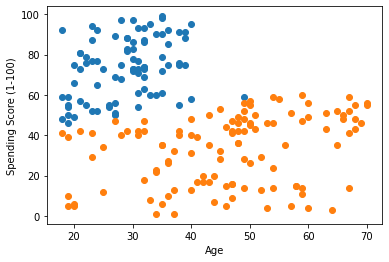

In [ ]:
#buat visualisasinya
df2a=df[df['Cluster2']==0]
df2b=df[df['Cluster2']==1]

plt.scatter(df2a['Age'],df2a['Spending Score (1-100)'])
plt.scatter(df2b['Age'],df2b['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

Cluster yang terbentuk dari model 2 ada sebanyak 2 cluster. Dengan plot antara Age dan Spending score diketahui bahwa cluster tersebut memiliki karakteristik tertentu yaitu
* Cluster 1 (titik data berwarna biru) adalah customer dengan Age menyebar antara 19 - 50 tahun dan Spending Score tinggi (antara 40-99).
* Cluster 2 (titik data berwarna oranye) adalah customer dengan Age menyebar antara 19 - 68 tahun dan Spending score rendah (antara 1 - 60).

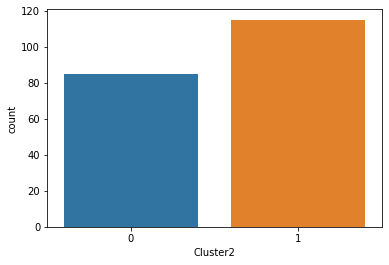

In [ ]:
sns.countplot(data = df, x = 'Cluster2')
#liat jumlah data tiap cluster

Dari barplot di atas, diketahui bahwa jumlah cluster 1 sebanyak 85 dan cluster 2 sebanyak 115.

### Evaluasi

Evaluasi model yang digunakan ada tiga yaitu Silhouette Coefficient, Calinski-Harabasz Index, dan Davies-Bouldin Index

In [ ]:
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

In [ ]:
metrics.silhouette_score(df[['Age', 'Spending Score (1-100)']], model2.labels_, metric='euclidean')

0.4692341232501655

Metrics ini membagi setiap value/pengamatan dan membandingkan dua skor yaitu nilai a (rata-rata jarak antara sebuah pengamatan dengan pengamatan lain dalam satu cluster) dan nilai b (rata-rata jarak antara sebuah pengamatan dengan pengamatan lain di cluster lain terdekat).

Nilai metrics ini antara 0 - 1, semakin mendekati 1 maka cluster semakin baik.

Pada model cluster pertama, diperoleh nilai silhouette sebesar 0,469 yang artinya kualitas cluster kurang baik/lemah.

In [ ]:
metrics.calinski_harabasz_score(df[['Age', 'Spending Score (1-100)']], model2.labels_)

249.19429134176448

Indeks Calinski-Harabasz menghitung perbandingan antara nilai
Sum of Square between cluster sebagai separation dan nilai Sum of Square within
cluster sebagai compactness yang dikalikan dengan faktor normalisasi.

Semakin besar nilai index ini maka cluster semakin baik.

Pada model cluster pertama, diperoleh nilai index Calinski-Harabasz sebesar 249,194 yang artinya kualitas cluster kurang baik/lemah.

In [ ]:
davies_bouldin_score(df[['Age', 'Spending Score (1-100)']], model2.labels_)

0.7722203222724408

Indeks Davies-Bouldin menghitung rata-rata nilai 'similarity' di antara cluster. Nilai 'similarity; yaitu perbandingan jarak antar cluster dengan ukuran cluster itu sendiri.

Semakin kecil (mendekati 0) nilai index ini maka cluster semakin baik.

Pada model pertama didapat nilai indek Davies-Bouldin sebesar 0.772 yang tidak mendekati 0, artinya kualitas cluster kurang baik/lemah.

## Model Cluster 3 (berdasarkan variabel Age, Annual Income dan Spending Score)

<Figure size 1152x576 with 0 Axes>

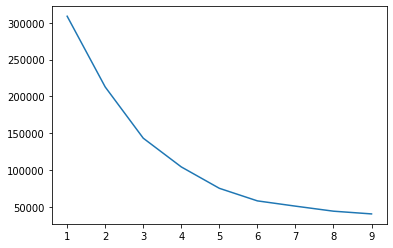

<Figure size 1152x576 with 0 Axes>

In [ ]:
#Elbow Method
#untuk mencari jumlah cluster optimal jika tidak diketahui akan dibagi berapa cluster

dist = []
K = range (1, 10)

for i in K:
  kmean = KMeans(n_clusters = i)
  kmean.fit(dfcluster)
  dist.append(kmean.inertia_)

plt.plot(K, dist)
plt.figure(figsize = (16,8))

Untuk mengetahui berapa jumlah cluster optimal yang diperlukan, kita bisa menggunakan metode Elbow. Cari titik dimana garis mengalami patahan atau membentuk siku yaitu pada titik ke 3.

In [ ]:
#buat model dengan jumlah cluster = 3

model3 = KMeans(n_clusters=3)
model3.fit(dfcluster)
print(model3.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [ ]:
df['Cluster3'] = model3.labels_
#buat kolom baru di df dengan nama Cluster yg isinya merupakan variabel cluster
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster1,Cluster2,Cluster3
0,Male,19,15,39,0,1,1
1,Male,21,15,81,0,0,1
2,Female,20,16,6,0,1,1
3,Female,23,16,77,0,0,1
4,Female,31,17,40,0,1,1


Text(0, 0.5, 'Spending Score (1-100)')

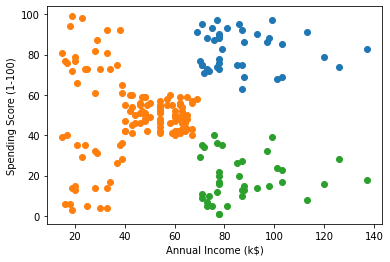

In [ ]:
#buat visualisasi berdasarkan plot antara Annual Income dan Spending Score
df3a=df[df['Cluster3']==0]
df3b=df[df['Cluster3']==1]
df3c=df[df['Cluster3']==2]

plt.scatter(df3a['Annual Income (k$)'],df3a['Spending Score (1-100)'])
plt.scatter(df3b['Annual Income (k$)'],df3b['Spending Score (1-100)'])
plt.scatter(df3c['Annual Income (k$)'],df3c['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

Cluster yang terbentuk dari model 3 ada sebanyak 3 cluster. Dengan plot antara Annual Income dan Spending score diketahui bahwa cluster tersebut memiliki karakteristik tertentu yaitu
* Cluster 1 (titik data berwarna hijau) adalah customer dengan Annual Income tinggi (antara 70 sampai 140 ribu dollar) dan Spending Score rendah (antara 1-40).
* Cluster 2 (titik data berwarna oranye) adalah customer dengan Annual Income rendah (antara 15 sampai 70 ribu dollar) dan Spending score menyebar antara 1 - 99.
* Cluster 3 (titik data berwarna biru) adalah customer dengan Annual Income tinggi (antara 70 sampai 140 ribu dollar) dan Spending Score yang juga tinggi (antara 60-99).

Text(0, 0.5, 'Spending Score (1-100)')

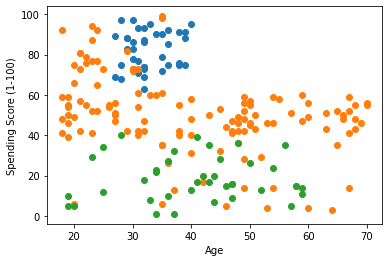

In [ ]:
#buat visualisasi berdasarkan plot antara Age dan Spending Score
df4a=df[df['Cluster3']==0]
df4b=df[df['Cluster3']==1]
df4c=df[df['Cluster3']==2]

plt.scatter(df4a['Age'],df4a['Spending Score (1-100)'])
plt.scatter(df4b['Age'],df4b['Spending Score (1-100)'])
plt.scatter(df4c['Age'],df4c['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

Dengan plot antara Age dan Spending score diketahui bahwa cluster tersebut memiliki karakteristik tertentu yaitu
* Cluster 1 (titik data berwarna hijau) adalah customer dengan Age menyebar antara 19 - 60 tahun dan Spending Score rendah (antara 1-40).
* Cluster 2 (titik data berwarna oranye) adalah customer dengan Age menyebar antara 19 - 70 tahun dan Spending score menyebar antara 1 - 99.
* Cluster 3 (titik data berwarna biru) adalah customer dengan Age antara 25 - 42 tahun dan Spending Score yang tinggi (antara 60-99).

Dari plot antara Age dan Spending Score batas antar cluster tidak terlihat dengan jelas, maka dapat diketahui bahwa walaupun ketiga variabel diikutsertakan dalam analisis, cluster hanya dibagi berdasarkan variabel Annual Income dan Spending Score.

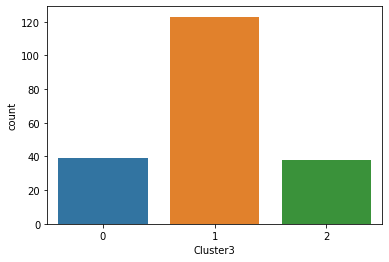

In [ ]:
sns.countplot(data = df, x = 'Cluster3')
#liat jumlah data tiap cluster

Dari barplot di atas, diketahui bahwa jumlah cluster 1 dan 3 sama yaitu 40, sedangkan cluster 1 memiliki jumlah terbanyak yaitu 120.

### Evaluasi

Evaluasi model yang digunakan ada tiga yaitu Silhouette Coefficient, Calinski-Harabasz Index, dan Davies-Bouldin Index

In [ ]:
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

In [ ]:
metrics.silhouette_score(dfcluster, model3.labels_, metric='euclidean')

0.3839349967742105

Metrics ini membagi setiap value/pengamatan dan membandingkan dua skor yaitu nilai a (rata-rata jarak antara sebuah pengamatan dengan pengamatan lain dalam satu cluster) dan nilai b (rata-rata jarak antara sebuah pengamatan dengan pengamatan lain di cluster lain terdekat).

Nilai metrics ini antara 0 - 1, semakin mendekati 1 maka cluster semakin baik.

Pada model cluster pertama, diperoleh nilai silhouette sebesar 0,384 yang artinya kualitas cluster kurang baik/lemah.

In [ ]:
metrics.calinski_harabasz_score(dfcluster, model3.labels_)

113.70507138642179

Indeks Calinski-Harabasz menghitung perbandingan antara nilai
Sum of Square between cluster sebagai separation dan nilai Sum of Square within
cluster sebagai compactness yang dikalikan dengan faktor normalisasi.

Semakin besar nilai index ini maka cluster semakin baik.

Pada model cluster pertama, diperoleh nilai index Calinski-Harabasz sebesar 113,705 yang artinya kualitas cluster kurang baik/lemah.

In [ ]:
davies_bouldin_score(dfcluster, model3.labels_)

0.8748062648492884

Indeks Davies-Bouldin menghitung rata-rata nilai 'similarity' di antara cluster. Nilai 'similarity; yaitu perbandingan jarak antar cluster dengan ukuran cluster itu sendiri.

Semakin kecil (mendekati 0) nilai index ini maka cluster semakin baik.

Pada model pertama didapat nilai indek Davies-Bouldin sebesar 0.875 yang tidak mendekati 0, artinya kualitas cluster kurang baik/lemah.